# Проект e-commerce: вариант 1 

In [271]:
import pandas as pd
import numpy as np
from datetime import timedelta
from operator import attrgetter
import matplotlib.pyplot as plt

Таблица с уникальными идентификаторами пользователей:

In [272]:
olist_customers = pd.read_csv('olist_customers_dataset.csv') 
olist_customers.head(10) 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

In [273]:
olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Пропущенных значений нет.

Товарные позиции, входящие в заказы:

In [274]:
olist_order_items = pd.read_csv('olist_order_items_dataset.csv') 
olist_order_items.head(10) 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


order_id — уникальный идентификатор заказа (номер чека)

order_item_id — идентификатор товара внутри одного заказа

product_id — ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price — цена за единицу товара

freight_value — вес товара

In [275]:
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Пропущенных значений нет.

Таблица заказов:

In [276]:
olist_orders = pd.read_csv('olist_orders_dataset.csv') 
olist_orders.head(10) 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


order_id — уникальный идентификатор заказа (номер чека)

customer_id — позаказный идентификатор пользователя

order_status — статус заказа

created — создан \
approved — подтверждён \
invoiced — выставлен счёт \
processing — в процессе сборки заказа \
shipped — отгружен со склада \
delivered — доставлен пользователю \
unavailable — недоступен \
canceled — отменён

order_purchase_timestamp — время создания заказа

order_approved_at — время подтверждения оплаты заказа

order_delivered_carrier_date — время передачи заказа в логистическую службу

order_delivered_customer_date — время доставки заказа

order_estimated_delivery_date — обещанная дата доставки

In [277]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Пропущенные значения есть в столбцах order_approved_at (время подтверждения оплаты заказа), order_delivered_carrier_date (время передачи заказа в логистическую службу) и order_delivered_customer_date (время доставки заказа)

## Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.

Проверим у всех ли доставленных или пререданных в доставку заказов есть дата подтверждения оплаты, у всех ли доставленных заказов указано время передачи в логистическую службу.

In [278]:
olist_orders.query('order_delivered_customer_date.notna() and order_delivered_carrier_date.isna()')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00


У одного заказа дата доставки есть, а даты передачи в логичтическую службу нет. Возможно произошел какой-то сбой или товар выдали прямо со склада.

In [279]:
olist_orders.query('order_delivered_customer_date.notna() and order_approved_at .isna()')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


Не у всех доставленных заказов есть дата подтверждения оплаты заказа. Это может быть связано с задержкой обработки платежа или какой-нибудь акцией. Запомним на будущее, что все они имеют статс "доставлено".

In [280]:
olist_orders.query('order_delivered_carrier_date.notna() and order_approved_at.isna()')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


Аналочные результаты для даты передачи в логистическую фирму.

Можно сделать вывод, что при решении, что считать покупкой, лучше опираться не на столбец order_approved_at, а на статус заказа. Рассмотрим статусы заказов подробнее. Покупкой можно считать заказ, который оплачен, т.е. рассмотрим только статусы processing, shipped, delivered.

Заказы со статусами created, approved, invoiced считать покупкой не будем, так как нет гарантий, что заказ не недоступен или не будет отменен. Найдем количество заказов со статусами processing, shipped, delivered.

Количество заказов, у которых статус "в процессе сборки" и оплата подтверждена:

In [281]:
olist_orders.query('order_status == "processing" and order_approved_at.notna()').shape[0] 

301

Количество заказов, у которых статус "в процессе сборки" и оплата не подтверждена:

In [282]:
olist_orders.query('order_status == "processing" and order_approved_at.isna()').shape[0]

0

Количество заказов, у которых статус "отгружен со склада" и оплата подтвержена:

In [283]:
olist_orders.query('order_status == "shipped" and order_approved_at.notna()').shape[0] 

1107

Количество заказов, у которых статус "отгружен со склада" и оплата не подтвержена:

In [284]:
olist_orders.query('order_status == "shipped" and order_approved_at.isna()').shape[0]

0

Количество заказов, у которых статус "доставлен" и оплата подтвержена:

In [285]:
olist_orders.query('order_status == "delivered" and order_approved_at.notna()').shape[0] 

96464

In [ ]:
Количество заказов, у которых статус "доставлен" и оплата не подтвержена:

In [236]:
olist_orders.query('order_status == "delivered" and order_approved_at.isna()').shape[0]

14

Рассмотрим эти заказы подробнее:

In [237]:
olist_orders.query('order_status == "delivered" and order_approved_at.isna()')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


У всех заказов со статусами "в процессе сборки" и "отгружен" есть дата подтвержения оплаты. Среди доставленных заказов, у которых нет даты подтвердения платежа те самые заказы, которые упоминались ранее. Таким образом, будем считать покупкой заказы со статусами "processing", "shipped", "delivered".

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Таблица с купленными заказами:

In [238]:
olist_orders_buy = olist_orders.query('order_status == "processing" or order_status == "shipped" or order_status == "delivered"')
olist_orders_buy.shape[0]

97886

Соединим эту таблицу с таблицей покупателей:

In [239]:
orders_customers = olist_customers.merge(olist_orders_buy, how = 'inner', on = 'customer_id')
orders_customers.shape[0]

97886

Количество строк в объединении двух таблиц равно количеству строк в таблице olist_orders_buy, данные не были потеряны, для всех заказов найдена информация о покупателе, значит можно использовать inner. Для удобства выведем наши данные.

In [240]:
orders_customers.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05 00:00:00
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20 00:00:00
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,2018-01-13 14:51:55,2018-02-05 00:00:00


In [241]:
orders_customers['customer_id'].nunique()

97886

In [242]:
orders_customers['customer_unique_id'].nunique()

94686

Для каждого заказа клиенту присвоен свой id (customer_id), чтобы подсчитать количество заказов для каждого клиента нам понадобится уникальный id клиента, т.е. столбец customer_unique_id. Для того, чтобы найти клиентов, совершивших только один заказ, сгруппируем по уникальному айди клиентов и посчитаем количество заказов:

In [243]:
count_orders = orders_customers.groupby('customer_unique_id', as_index = False).agg({'order_id':'count'})
count_orders.query('order_id == 1').shape[0]

91814

То есть у нас 91814 клиентов, совершивших одну покупку.

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Заказы, которые имеют статус "создан", "подтвержден", "выставлен счет" рассматривать не будем, так как покупки в этих случаях еще не произошло. Заказы со статусами "в процессе сборки" и "отправлен" тоже, так как заказы в процессе доставки. Со статусом "delivered" все очевидно. Нам нужно рассмотреть заказы со статусами "отменен" и "недоступен". 

In [244]:
olist_orders_not_delivered = olist_orders.query('order_status == "unavailable" or order_status == "canceled"')

Проверим, есть ли в колонке с датами создания заказа пропущенные значения:

In [245]:
olist_orders_not_delivered['order_purchase_timestamp'].isna().unique()

array([False])

Пропущенных значений нет.

Приведем колонку с временем создания заказа к формату datetime:

In [246]:
olist_orders_not_delivered['order_purchase_timestamp'] = pd.to_datetime(olist_orders_not_delivered['order_purchase_timestamp'])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Вычислим количество заказов в месяц в среднем, которые не доставлены по причинам "отменен" и "недоступен". Для этого сгруппируем по месяцам и статусам заказов и посчитаем количество заказов, далее сгруппируем по статусу и найдем среднее количество не доставленных заказов:

In [247]:
olist_orders_not_delivered \
    .groupby([pd.PeriodIndex(olist_orders_not_delivered['order_purchase_timestamp'], freq="M"), 'order_status'], as_index = False) \
    .agg({'order_id' : 'count'}) \
    .groupby('order_status', as_index = False).agg({'order_id':'mean'})

,order_status,order_id
0,canceled,26.041667
1,unavailable,29.000000


## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.  

Таблица с купленными заказами:

In [248]:
olist_orders_buy1 = olist_orders.query('order_status == "processing" or order_status == "shipped" or order_status == "delivered"')

Соединим ее с таблицей содержащей товары (нас интересует только пересечение этих таблиц):

In [249]:
orders_items = olist_order_items.merge(olist_orders_buy1, how = 'inner', on = 'order_id')

Не у всех заказов есть время подтверждения оплаты (14 заказов имеют статус "доставлен", но не имеют времени подтверждения оплаты), ими мы пренебрежем, так как их сравнительно мало. Заменим дату подтверждения оплаты на день недели:

In [250]:
orders_items['order_approved_at'] = pd.to_datetime(orders_items['order_approved_at'])
orders_items['order_approved_at'] = orders_items['order_approved_at'].dt.day_name()

Для того, чтобы для каждого продукта найти день недели, в который он чаще всего покупается, сгруппируем таблицу по продукту и дню его покупки, найдем количество заказов для каждого дня и каждого продукта, отсортируем по убыванию количества заказов и оставим только первое упоминание продукта.

In [251]:
orders_items.groupby(['product_id', 'order_approved_at'], as_index = False).agg({'order_id':'count'}) \
    .sort_values('order_id', ascending = False).drop_duplicates(subset = 'product_id')

,product_id,order_approved_at,order_id
40699,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
19963,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15791,422879e10f46682990de24d770e7f83d,Tuesday,89
36222,99a4788cb24856965c36a24e339b6058,Tuesday,82
12952,368c6c730842d78016ad823897a372db,Thursday,80
...,...,...,...
23767,63f916d8413bc439687d549e937d5b67,Saturday,1
23768,63f9b908e4626ece2e47cec24ff8dd9c,Thursday,1
23769,6400587d9225c4ea09f3d5ae53860c11,Tuesday,1
23770,6401d2f82d6e6c52998ce626fe4eda24,Tuesday,1


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Используем таблицу с покупателями и заказами orders_customers из первого задания. Найдем количество заказов в месяц по каждому заказу:

In [252]:
orders_customers['order_approved_at'] = pd.to_datetime(orders_customers['order_approved_at'])
orders_customers_mounth = orders_customers \
    .groupby(['customer_unique_id', pd.PeriodIndex(orders_customers['order_approved_at'], freq="M")]) \
    .agg({'order_id':'count'}).reset_index() 

Добавим столбец, в котором для каждой даты cоздания заказа будет выдаваться количество недель в месяце.

In [253]:
orders_customers_mounth['weeks'] = orders_customers_mounth['order_approved_at'].dt.days_in_month / 7

Разделим количество заказов у каждого пользователя на количество недель в месяце и отсортируем в порядке убывания:

In [254]:
orders_customers_mounth['ans'] = orders_customers_mounth['order_id'] / orders_customers_mounth['weeks'] 
orders_customers_mounth[['customer_unique_id', 'order_approved_at', 'ans']].sort_values('ans', ascending = False)

,customer_unique_id,order_approved_at,ans
7215,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,1.354839
61243,a239b8e2fbce33780f1f1912e2ee5275,2017-02,1.000000
23574,3e43e6105506432c953e165fb2acf44c,2018-02,1.000000
68330,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,1.000000
66716,b08fab27d47a1eb6deda07bfd965ad43,2017-09,0.933333
...,...,...,...
40279,6a848322a8350bc1a5877e421cdee2e8,2018-03,0.225806
40280,6a8486027bddd6ae08e53aac48efb2a6,2018-03,0.225806
40284,6a86f95d0a405b9a093aaae872bd46d2,2017-07,0.225806
40285,6a8721efbaba71eb10c13a89c2e44c9b,2018-08,0.225806


## 5. Выполните когортный анализ пользователей. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.

Используем таблицу с покупателями и заказами orders_customers из первого задания. Удалим строки с пропусками к колонке order_approved_at (их всего 14), приведем дату к удобному нам формату месяц-год, выведем уникальные значения столбца order_approved_at.

In [255]:
orders_customers['order_approved_at'] = orders_customers['order_approved_at'].dropna()
orders_customers['order_approved_at'] = orders_customers['order_approved_at'].dt.to_period("M")
orders_customers['order_approved_at'].sort_values().unique()

<PeriodArray>
['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
 '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
 '2018-07', '2018-08', '2018-09',     'NaT']
Length: 25, dtype: period[M]

Нам нужно рассмотреть промежуток времени с января по декабрь, такой промежуток целиком есть в 2017 году. Для каждого покупателя найдем дату первой покупки, для этого отберем только те значения, которые принадлежат нужному нам промежутку, сгруппируем по id клиентов и найдем для каждого покупателя минимальную дату.

In [256]:
orders_customers_first_mounth = orders_customers \
    .query('order_approved_at >= "2017-01" and order_approved_at <= "2017-12"') \
    .groupby('customer_unique_id') \
    .agg({'order_approved_at':'min'}) \
    .reset_index() \
    .rename(columns = {'order_approved_at' : 'first_mounth'})

Объединим таблицу с предыдущего шага с таблицей клиентов и заказов. Сгруппируем по дате подтверждения оплаты и по дате первой подтвержденной оплаты, найдем количество аккаунтов:

In [257]:
df = orders_customers.query('order_approved_at >= "2017-01" and order_approved_at <= "2017-12"') \
    .merge(orders_customers_first_mounth, how = 'inner', on = 'customer_unique_id') \
    [['customer_unique_id', 'order_approved_at', 'first_mounth']]
df = df.groupby(['order_approved_at', 'first_mounth']).agg({'customer_unique_id':'count'}).reset_index()
df

,order_approved_at,first_mounth,customer_unique_id
0,2017-01,2017-01,739
1,2017-02,2017-01,4
2,2017-02,2017-02,1686
3,2017-03,2017-01,2
4,2017-03,2017-02,4
...,...,...,...
72,2017-12,2017-08,16
73,2017-12,2017-09,18
74,2017-12,2017-10,13
75,2017-12,2017-11,41


Рассчитаем сколько месяцев прошло между датами подтверждения оплаты и датами подтверждения первой оплаты, приведем результат к более удобному виду:

In [258]:
df['diff_days'] =(df['order_approved_at'] - df['first_mounth']).apply(attrgetter("n"))

Визуализируем данные. Для этого создадим таблицу, где строками будут даты первой оплаты, столбцами количество месяцев с первой оплаты, а значениями количество аккаунтов. Сразу же преобразуем значения в проценты.

In [259]:
df_pivot = pd.pivot(df, index = 'first_mounth', columns = 'diff_days', values = 'customer_unique_id')
ur_style = ( df_pivot \
            .divide(df_pivot[0], axis = 0).round(5)
            .style
            .background_gradient()  
            .highlight_null('white') 
            .format("{:}", na_rep="")) 
ur_style

diff_days,0,1,2,3,4,5,6,7,8,9,10,11
first_mounth,,,,,,,,,,,,
2017-01,1.0,0.00541,0.00271,0.00135,0.00406,0.00135,0.00406,0.00135,0.00135,,0.00271,0.00271
2017-02,1.0,0.00237,0.00237,0.00178,0.00415,0.00119,0.00237,0.00178,0.00059,0.00178,0.00119,
2017-03,1.0,0.00535,0.00344,0.0042,0.00344,0.00153,0.00153,0.00306,0.00306,0.00115,,
2017-04,1.0,0.00647,0.00259,0.00216,0.00259,0.00259,0.00388,0.00259,0.00345,,,
2017-05,1.0,0.00556,0.00501,0.00389,0.00306,0.00417,0.00473,0.00139,,,,
2017-06,1.0,0.00443,0.0038,0.0038,0.00253,0.00317,0.00348,,,,,
2017-07,1.0,0.00573,0.00312,0.00182,0.0039,0.00182,,,,,,
2017-08,1.0,0.00665,0.00404,0.00261,0.0038,,,,,,,
2017-09,1.0,0.0065,0.00481,0.00433,,,,,,,,


Максимальный retention когорты на 3й месяц 2017-09

## 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

В кластеризации выберем следующие метрики: \
R - время от последней покупки пользователя до текущей даты, \
F - суммарное количество покупок у пользователя за всё время, \
M - сумма покупок за всё время. \
Для каждого RFM-сегмента построим границы метрик recency, frequency и monetary для интерпретации этих кластеров. \
Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

Для решения этой задачи объединим таблицу из первого задания orders_customers с таблицей olist_order_items:

In [260]:
olist_orders_buy = olist_orders.query('order_status == "processing" or order_status == "shipped" or order_status == "delivered"')
orders_customers = olist_customers.merge(olist_orders_buy, how = 'inner', on = 'customer_id')
orders_customers['order_approved_at'] = pd.to_datetime(orders_customers['order_approved_at'])
orders_customers_items = orders_customers.merge(olist_order_items, how = 'inner', on = 'order_id')

Рассчитаем R - время от последней покупки пользователя до текущей даты. Для этого найдем дату последней покупки, за текущею дату будем считать '2018-09-01', для каждого пользователя найдем разницу.

In [261]:
orders_customers_items_last = orders_customers_items \
    .groupby('customer_unique_id') \
    .agg({'order_approved_at':'max'}) \
    .reset_index() \
    .rename(columns = {'order_approved_at' : 'last_mounth'})
orders_customers_items = orders_customers_items \
    .merge(orders_customers_items_last, how = 'inner', on = 'customer_unique_id')
orders_customers_items['R'] = (pd.to_datetime('2018-09-01') - orders_customers_items['last_mounth']).dt.days

Рассчитаем F - суммарное количество покупок у пользователя за всё время.

In [262]:
dF = orders_customers.groupby('customer_unique_id').agg({'order_id':'count'})
orders_customers_items = orders_customers_items.merge(dF, how = 'inner', on = 'customer_unique_id') \
    .rename(columns = {'order_id_y' : 'F'})

M - сумма покупок за всё время

In [263]:
orders_customers_items = orders_customers_items \
    .merge(orders_customers_items.groupby('customer_unique_id') \
    .agg({'price':'sum'}), how = 'inner', on = 'customer_unique_id') \
    .rename(columns = {'price_y' : 'M'})
orders_customers_items[['customer_unique_id', 'R', 'F', 'M']].groupby('customer_unique_id')

Избавимся от дублей в данных и посмотрим, что они из себя представляют:

In [264]:
RFM = orders_customers_items[['customer_unique_id', 'R', 'F', 'M']].drop_duplicates()
RFM.head(10)

,customer_unique_id,R,F,M
0,861eff4711a542e4b93843c6dd7febb0,472.0,1,124.99
1,290c77bc529b7ac935b93aa66c333dc3,231.0,1,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,103.0,1,139.94
3,259dac757896d24d7702b9acbbff3f3c,171.0,1,149.94
4,345ecd01c38d18a9036ed96c73b8d066,33.0,1,230.00
5,4c93744516667ad3b8f1fb645a3116a4,320.0,2,506.52
7,addec96d2e059c80c30fe6871d30d177,193.0,1,14.99
8,57b2a98a409812fe9618067b6b8ebe4f,288.0,1,19.90
9,1175e95fb47ddff9de6b2b06188f7e0d,225.0,2,54.99
11,9afe194fb833f79e300e37e580171f22,235.0,1,99.90


Рассмотрим следующие 5 диапазонов: <10, 10-35, 35-65, 65-97, >97

In [265]:
quantiles = RFM.quantile(q=[0.1, 0.35, 0.65, 0.97])
quantiles

,R,F,M
0.10,43.0,1.0,25.99
0.35,158.0,1.0,59.90
0.65,283.0,1.0,120.00
0.97,545.0,2.0,598.00


Из-за того, что клиенты совершают в основном по 1 заказу, квантили F получились одинаковыми.

Для каждого RFM-сегмента построим границы метрик recency, frequency и monetary для интерпретации этих кластеров:

#### R - время от последней покупки пользователя до текущей даты: 
1: до 43 дней \
2: 43-158 дней (1,5 месяца-полгода) \
3: 158-283 дней (от полугода до 10 месяцев) \
4: 283 - 545 (от 10 месяцев до 1,5 лет) \
5: от 545 дней (от 1,5 лет)

#### F - суммарное количество покупок у пользователя за всё время: 
1: 1 покупка \
2: 2 и более покупок

##### M - сумма покупок за всё время: 
1: до 25.99 \
2: от 25.99 до 59.90 \
3: от 59.90 до 120 \
4: от 120 до 598 \
5: от 598
    

Напишем методы для присвоения рангов от 1 до 5:

In [266]:
quintiles = RFM[['R', 'F', 'M']].quantile([.1, .35, .65, .97]).to_dict()
def r_score(x):
    if x <= quintiles['R'][.1]:
        return 5
    elif x <= quintiles['R'][.35]:
        return 4
    elif x <= quintiles['R'][.65]:
        return 3
    elif x <= quintiles['R'][.97]:
        return 2
    else:
        return 1
    
def fm_scoreF(x, c):
    if x <= quintiles[c][.97]:
        return 1
    else:
        return 5  
    
def fm_scoreM(x, c):
    if x <= quintiles[c][.1]:
        return 1
    elif x <= quintiles[c][.35]:
        return 2
    elif x <= quintiles[c][.65]:
        return 3
    elif x <= quintiles[c][.97]:
        return 4
    else:
        return 5     

Получим оценки R, F и M каждого клиента:

In [267]:
RFM['Recency'] = RFM['R'].apply(lambda x: r_score(x))
RFM['Frequency'] = RFM['F'].apply(lambda x: fm_scoreF(x, 'F'))
RFM['Monetary'] = RFM['M'].apply(lambda x: fm_scoreM(x, 'M'))

Объединим оценки R, F и M:

In [268]:
RFM['RFM Score'] = RFM['Recency'].map(str) + RFM['Frequency'].map(str) + RFM['Monetary'].map(str)

Теперь мы можем вывести оценку по каждому игроку:

In [269]:
RFM[['customer_unique_id', 'RFM Score']]

,customer_unique_id,RFM Score
0,861eff4711a542e4b93843c6dd7febb0,214
1,290c77bc529b7ac935b93aa66c333dc3,314
2,060e732b5b29e8181a18229c7b0b2b5e,414
3,259dac757896d24d7702b9acbbff3f3c,314
4,345ecd01c38d18a9036ed96c73b8d066,514
...,...,...
111734,1a29b476fee25c95fbafc67c5ac95cf8,413
111735,d52a67c98be1cf6a5c84435bd38d095d,413
111736,e9f50caf99f032f0bf3c55141f019d99,412
111737,73c2643a0a458b49f58cea58833b192e,215


555 - лояльные: совершали покупку недавно, имеют большой чек и это не первая их покупка, \
111 - не лояльные: совершали единичную покупку давно и на маленький чек, \ 
Клиенты, имеющие R = 1 или 2, F = 2, M = 4, 5 — лояльные, но давно не проявлявшие активность, клиенты, имеющие повторные покупки и большой чек, но давно не совершавшие новых покупок. Для них имеет смысл устроить какую-нибудь акцию, сделать скидки и т.п.

Теперь, когда у нас есть оценки, мы можем визуализировать данные, чтобы получить лучшее представление о портфеле наших клиентов:

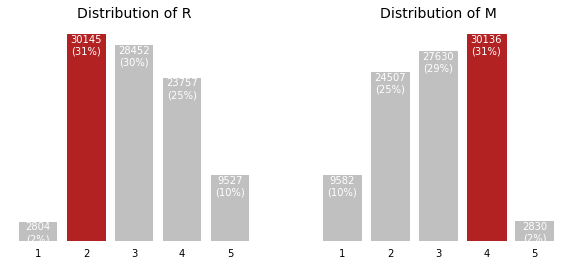

In [270]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['Recency', 'Monetary']):
    parameters = {'Recency':'R', 'Monetary':'M'}
    y = RFM[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

Мы видим, что время последней покупки и сумма покупок распределились почти нормальным образом, более 30 процентов клиентов совершали покупку не более чем за последние полгода, большая часть клиентов имеет суммарный чек от 120 до 598.